## <center>Assignment 3</center>
#### <center>Gaukhar Dauzhan</center>

In [166]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Determine the roots of the following simultaneous nonlinear equations
$$y = − x^2 + x + 0.75 (1)$$ 
$$y + 5xy = x^2  (2)$$
using (a) fixed-point iteration and (b) the Newton-Raphson method with a precision of $10^{−12}$ .

### (a) Fixed-point iteration 

Reformulate (2) into $$x=\frac{0.75-y}{x-1} = u(x,y)$$
                     $$y= \frac{x^2}{1 + 5x} = v(x,y)$$

In [167]:
def u(x,y):
    return (0.75-y)/(x-1)
def v(x,y):
    return x**2/(1+5*x)


#### Convergence condition

$$|\frac{\partial u}{\partial x}|+|\frac{\partial u}{\partial y}|<1  (a) $$
$$|\frac{\partial v}{\partial x}|+|\frac{\partial v}{\partial y}|<1  (b) $$

Convergent for x<-0.28165 and x>2

$$x_{i+1}=u(x_i,y_i)$$
$$y_i=v(x_{i+1},y_i)$$

In [168]:
def fixedPoint(x0, y0, maxIter, err):
    ilist=[]
    elist=[]
    xcurr=x0; ycurr=y0; i=0; e=100;
    while i<maxIter and e>err:
        xnext=u(xcurr,ycurr)
        ynext=v(xnext,ycurr)
        if xnext!=0 and ynext!=0:
            ex=abs((xnext-xcurr)/xnext)
            ey=abs((ynext-ycurr)/ynext)
            e=(ex**2+ey**2)**0.5
        xcurr=xnext;ycurr=ynext
        ilist.append(i)
        elist.append(e)
        i+=1
    return xcurr,ycurr,ilist,elist

#### Finding roots using fixed-point iteration: 3 initial guesses

In [169]:
x1,y1,i1,e1 = fixedPoint(-100, 100, 50, 1e-12)
print("x1 =",x1, ", y1 =",y1)
print("number of iterations required to reach the accuracy 10^(-12) =",i1[len(i1)-1])

x1 = -0.5852737964337669 , y1 = -0.17781921322587638
number of iterations required to reach the accuracy 10^(-12) = 26


In [170]:
x2,y2,i2,e2 = fixedPoint(-10, 10, 50, 1e-12)
print("x2 =",x2, "y2 =",y2)
print("number of iterations required to reach the accuracy 10^(-12) =",i2[len(i2)-1])

x2 = -0.5852737964338797 y2 = -0.17781921322589284
number of iterations required to reach the accuracy 10^(-12) = 25


In [171]:
x3,y3,i3,e3 = fixedPoint(-1, 0, 50, 1e-12)
print("x3 =",x3, "y3 =",y3)
print("number of iterations required to reach the accuracy 10^(-12) =",i3[len(i3)-1])

x3 = -0.5852737964338635 y3 = -0.17781921322589045
number of iterations required to reach the accuracy 10^(-12) = 23


In this form the equation gives only one pair of roots due to convergence restrictions

#### Compute time

In [172]:
timeit fixedPoint(-100, 100, 50, 1e-12)

1000 loops, best of 3: 181 µs per loop


In [173]:
timeit fixedPoint(-10, 10, 50, 1e-12)

10000 loops, best of 3: 174 µs per loop


In [174]:
timeit fixedPoint(-1, 0, 50, 1e-12)

10000 loops, best of 3: 163 µs per loop


#### Graph: Dependency of precision on the number of iterations

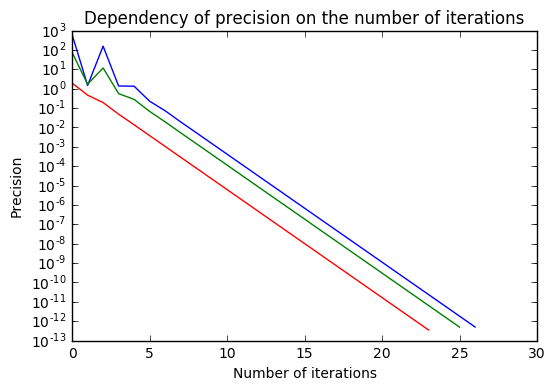

In [175]:
plt.plot(i1,e1)
plt.plot(i2,e2)
plt.plot(i3,e3)
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Precision')
plt.title('Dependency of precision on the number of iterations')
plt.show()


### (b) Newton-Raphson method

$$f(x,y)=y+x^2-0.75$$
$$g(x,y)=y+5xy-x^2$$
$$x_{i+1}=x-\frac{1}{j(x,y)(f(x,y)gy(x,y)-g(x,y)fy(x,y)}$$
$$y_{i+1}=y-\frac{1}{j(x,y)(g(x,y)fx(x,y)-f(x,y)gx(x,y)}$$

In [176]:
def f(x,y):
    return y+x**2-x-0.75
def g(x,y):
    return y+ 5*x*y -x**2
def fx(x,y):
    return 2*x-1
def fy(x,y):
    return 1.0
def gx(x,y):
    return 5*y-2*x
def gy(x,y):
    return 1+5*x
def j(x,y):
    return fx(x,y)*gy(x,y)-fy(x,y)*gx(x,y)
def xnextf(x,y):
    return x-1/j(x,y)*(f(x,y)*gy(x,y)-g(x,y)*fy(x,y))
def ynextf(x,y):
    return y-1/j(x,y)*(g(x,y)*fx(x,y)-f(x,y)*gx(x,y))

In [177]:
def newRaph(x0,y0, maxIter, err):
    iarr=[]
    earr=[]
    xcurr=x0; ycurr=y0; i=0; e=100
    while i<maxIter and e>err:
        xnext=xnextf(xcurr,ycurr)
        ynext=ynextf(xcurr,ycurr)
        if xnext!=0 and ynext!=0:
            ex=abs((xnext-xcurr)/xnext)
            ey=abs((ynext-ycurr)/ynext)
            e=(ex**2+ey**2)*0.5
        iarr.append(i)
        earr.append(e)
        xcurr=xnext;ycurr=ynext;
        i+=1;
    return xcurr, ycurr, iarr, earr

#### Finding roots using fixed-point method: 3 initial guesses

In [178]:
x1,y1,i1,e1 = newRaph(-100, 100, 50, 1e-12)
print("x1 =",x1, ", y1 =",y1)
print("number of iterations required to reach the accuracy 10^(-12) =",i1[len(i1)-1])

x1 = 1.3720654058273323 , y1 = 0.23950192795921027
number of iterations required to reach the accuracy 10^(-12) = 12


In [179]:
x2,y2,i2,e2 = newRaph(-10, 10, 50, 1e-12)
print("x2 =",x2, "y2 =",y2)
print("number of iterations required to reach the accuracy 10^(-12) =",i2[len(i2)-1])

x2 = -0.18679160939350856 y2 = 0.5283172852666743
number of iterations required to reach the accuracy 10^(-12) = 13


In [180]:
x3,y3,i3,e3=newRaph(-1, 0, 50, 1e-12)
print("x3 =",x3, "y3 =",y3)
print("number of iterations required to reach the accuracy 10^(-12) =",i3[len(i3)-1])

x3 = -0.5852737964338237 y3 = -0.1778192132258847
number of iterations required to reach the accuracy 10^(-12) = 4


#### Compute time

In [181]:
timeit newRaph(-100, 100, 50, 1e-12)

1000 loops, best of 3: 260 µs per loop


In [182]:
timeit newRaph(-10, 10, 50, 1e-12)

1000 loops, best of 3: 283 µs per loop


In [183]:
timeit newRaph(-1, 0, 50, 1e-12)

10000 loops, best of 3: 104 µs per loop


#### Graph: Dependency of precision on the number of iterations

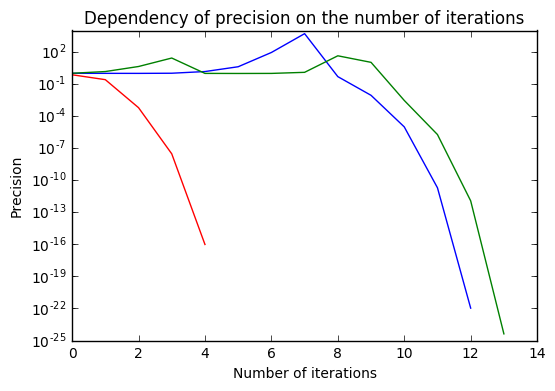

In [184]:
plt.plot(i1,e1)
plt.plot(i2,e2)
plt.plot(i3,e3)
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Precision')
plt.title('Dependency of precision on the number of iterations')
plt.show()

#### Conclusion

The results show that although on average <b>fixed-point iteration</b> takes less time to compute a root in this case, it can find only one root due to convergence conditions, whereas <b>Newton-Raphson method</b> allows to find all three roots depending on the initial guesses.